In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

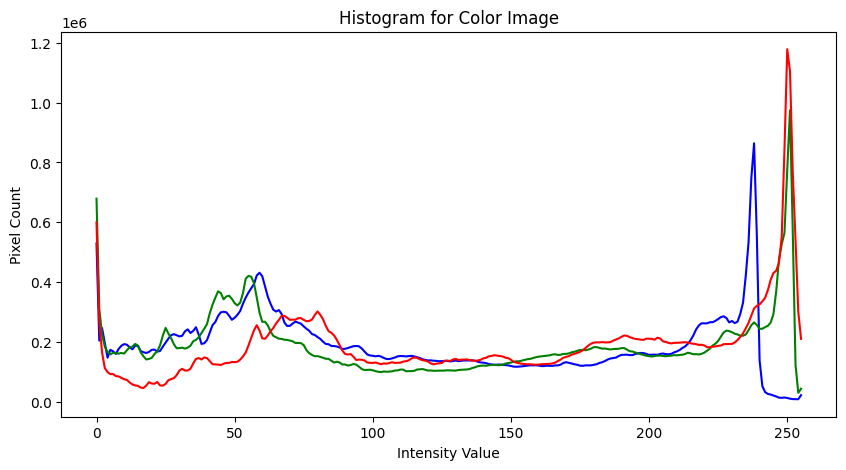

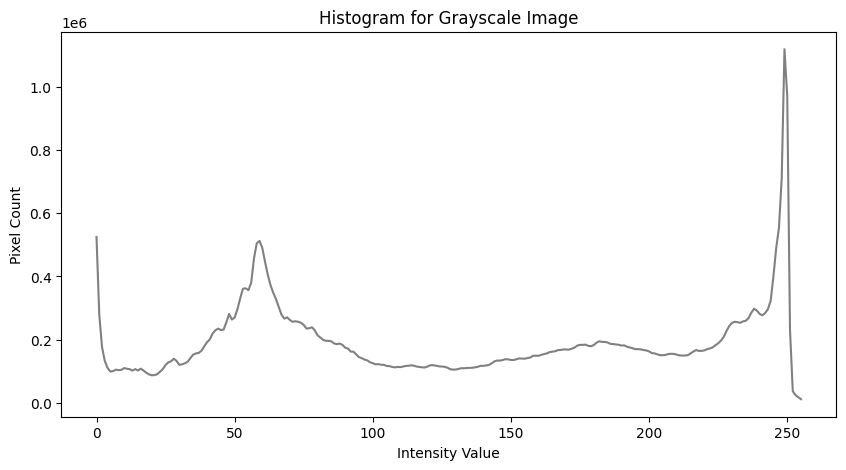

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_histogram(image, title, is_color=False):
    plt.figure(figsize=(10, 5))
    if is_color:
        colors = ('b', 'g', 'r')
        for i, col in enumerate(colors):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            plt.plot(hist, color=col)
        plt.title(title)
        plt.xlabel("Intensity Value")
        plt.ylabel("Pixel Count")
    else:
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        plt.plot(hist, color='gray')
        plt.title(title)
        plt.xlabel("Intensity Value")
        plt.ylabel("Pixel Count")
    plt.show()

color_img = cv2.imread("img.jpg")
color_img_rgb = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)

# Convert the color image to grayscale
gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY) # This line was missing, causing the error

plot_histogram(color_img, "Histogram for Color Image", is_color=True)
plot_histogram(gray_img, "Histogram for Grayscale Image", is_color=False)

In [10]:

equalized_gray = cv2.equalizeHist(gray_img)

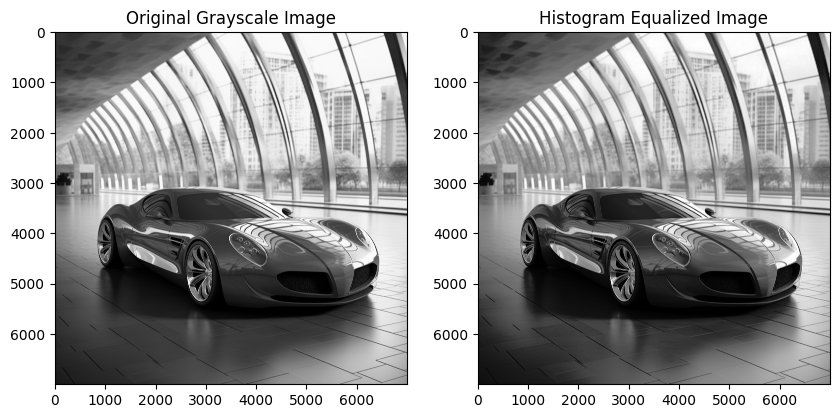

In [11]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(gray_img, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Histogram Equalized Image")
plt.imshow(equalized_gray, cmap='gray')
plt.show()

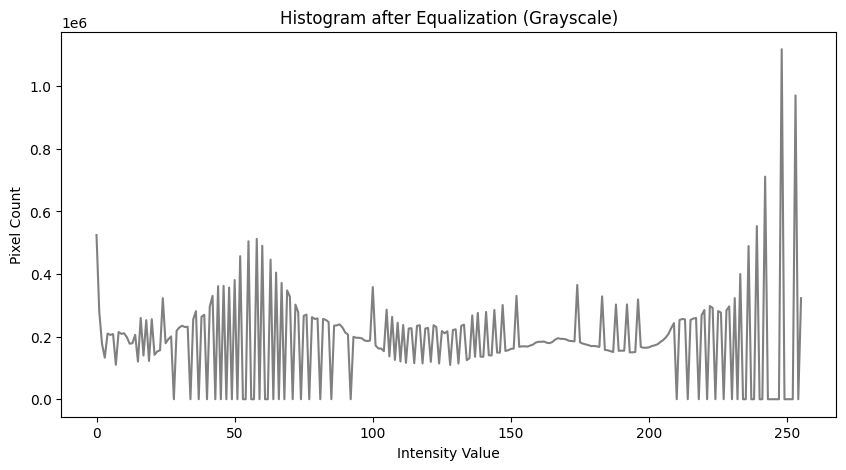

In [12]:

plot_histogram(equalized_gray, "Histogram after Equalization (Grayscale)")

In [13]:
image_gray = cv2.imread("Picture1.jpg", 0)


In [17]:
f_transform = np.fft.fft2(gray_img)
f_shift = np.fft.fftshift(f_transform)
magnitude_spectrum = 20 * np.log(np.abs(f_shift))

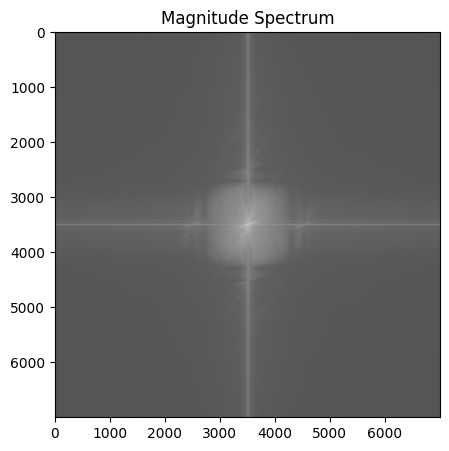

In [18]:
plt.figure(figsize=(10, 5))
plt.title("Magnitude Spectrum")
plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()

In [19]:
f_ishift = np.fft.ifftshift(f_shift)
img_reconstructed = np.fft.ifft2(f_ishift)
img_reconstructed = np.abs(img_reconstructed)

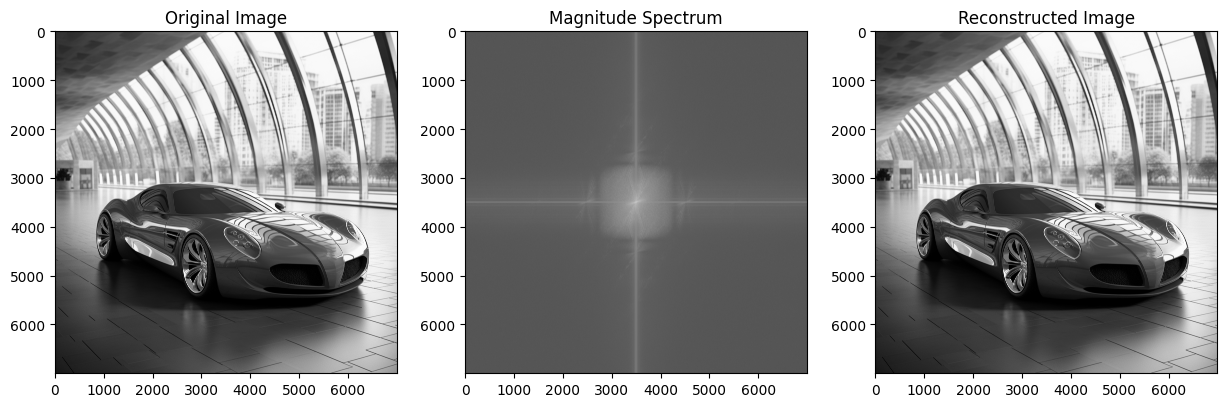

In [22]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(gray_img, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Magnitude Spectrum")
plt.imshow(magnitude_spectrum, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Reconstructed Image")
plt.imshow(img_reconstructed, cmap='gray')
plt.show()

In [23]:
angle = 45

In [26]:
(h, w) = gray_img.shape[:2]
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(gray_img, rotation_matrix, (w, h))

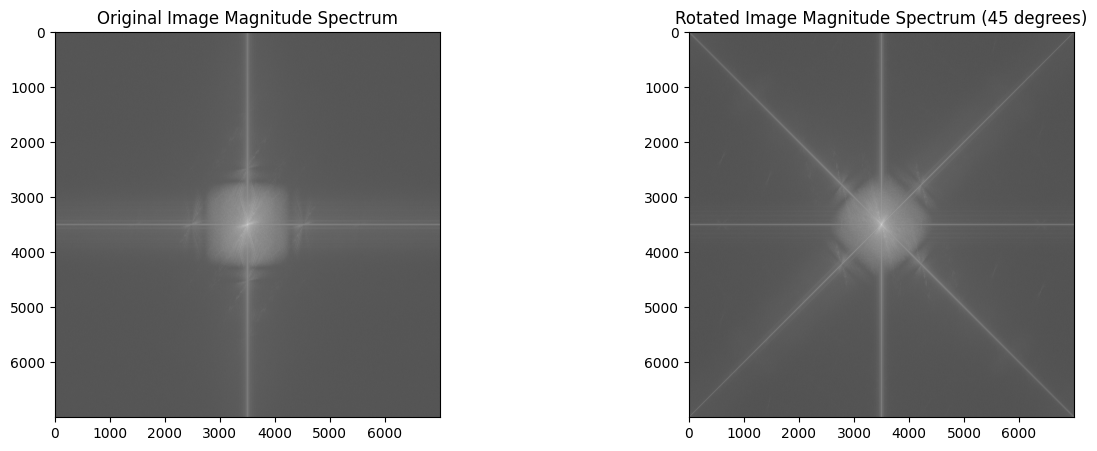

In [28]:

(h, w) = gray_img.shape[:2]
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(gray_img, rotation_matrix, (w, h))

f_transform_rotated = np.fft.fft2(rotated_image)
f_shift_rotated = np.fft.fftshift(f_transform_rotated)
magnitude_spectrum_rotated = 20 * np.log(np.abs(f_shift_rotated))


plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image Magnitude Spectrum")
plt.imshow(magnitude_spectrum, cmap='gray')

plt.subplot(1, 2, 2)
plt.title(f"Rotated Image Magnitude Spectrum ({angle} degrees)")
plt.imshow(magnitude_spectrum_rotated, cmap='gray')
plt.show()